# HW 4
# David Stanko, Aakash Krishna, Josh Wilkes

## Introduction

This work uses unsupervised learning to investigate patterns in student behavior and habits. We are using the [Student Habits and Academic Performance Dataset](https://www.kaggle.com/datasets/aryan208/student-habits-and-academic-performance-dataset?resource=download) from Kaggle datasets. It is a synthetic dataset containing features about students' lifestyle, backgrounds, habits, and academic performance. Some of the variables are the student's major, time spent studying, time spent on screens, mental health information, GPA, and exam scores. According to Kaggle, the goal of the dataset is explore how the last two variables are affected by the others. 

The data was generated using Python, with realistic statistical and algorithmic techniques to mimic real student behavior. Some things to note was that the exam score was derived from the GPA and some noise. The GPA was "computed based on study hours, sleep, stress, motivation, support, and tutoring" (Kaggle datasets page).

We will perform principal component analysis (PCA), matrix factorization, k-means clustering, and hierarchical clustering on this dataset. 

## Imports

In [74]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Theoretical Background

Understanding the relationship between study habits, health, and other cognitive factors has been a central focus in educational studies. In this project we looked at principal component analysis/SVD, Matrix completion, hierarchical clustering, and K-mean clustering to better understand and visualize these relationships.

Principal Component Analysis: PCA is a dimensionality reduction technique that identifies the directions in which the data varies most, then creates a new data set that is transformed under that new axis. This allows PCA to summarize complex, high-dimensional data into lower level data, aiding in computational efficiency. The principal components are a weighted combination of the original variance that have both scalar and vector properties.

Singular Value Decomposition: SVD is a matrix factorization that is very similar to PCA but it decomposes the data of matrix X into three matrices: X = USV. This decomposition allows to understand both the structure, direction, and magnitude of the predictors of the data.

Matrix Completion: Real world data often contains missing values. Our dataset also contains some missing data where a student may have forgotten to fill out a question or their response was not able to be determined. Matrix completion is a method for filling in these entries by assuming the data is approximately low-rank (explained by only a few predictors). This ensures that as much information as possible is kept before proceeding to clustering and visualization.

K-means clustering: K-means randomly partitions the data in to K-number of groups. And then iteratively selects a center point for each group and then re-assigns the groups to the center point until some threshold is met. This quickly groups the data in a high-level fashion

Hierarchical Clustering: Unlike K-means, hierarchical clustering builds a tree dendrogram of clusters without needing to specify the number of groups. This works by initially clustering the data and then merging similar pairs together until they are all groups Different linkage criteria exists such as complete, single, average, and Ward's linkage—determine how distances between clusters are computed. Hierarchical clustering allows us to visualize the structure of different student groups

## Methodology

A short description of data processing/cleaning, including selection of variables, and a detailed description of how you implemented and tested the models. You should be sure to discuss hyperparameter tuning (what values you tried, how you selected the best), error metrics, comparisons, cross-validation, etc.

Our dataset had some continuous variables, some discrete numerical variables, and some categorical variables. First, we dropped all the categorical variables, because those are hard to interpret in the unsupervised methods we're using. We kept many of the discrete numerical variables. Many of them were integer ratings from 0-5 or 0-10. We kept those because a rating of 1.5, for example, is interpretable. Finally, we scaled the data to have zero mean and unit variance. The preprocessed data matrix had 16 features, including academic performance information, screen time, study habits, and mental health data. 

Our models were as follows. First, we performed PCA on the preprocessed data. To see how well PCA approximates the data, we calculated and plotted the percent variance explained (PVE). To determine how many PCA components are needed for a good approximation, we calculated and plotted the cumulative PVE. We used PCA to obtain the importance of the variables, the correlations between them, and other information about the dataset. To quantify these, we looked at the matrix of principal component loadings, $\Phi$, and the transformed data, $Z$, and we made various plots of the original and transformed data.

[Matrix completion]

[k Means]

[Hierarchical ]

## Data preprocessing

### Examine the dataset

In [75]:
X = pd.read_csv("enhanced_student_habits_performance_dataset.csv")
X.head()

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,100000,26,Male,Computer Science,7.645367,3.0,0.1,Yes,70.3,6.2,...,10.9,Co-Learning Group,Yes,High,9,7,8,Reading,3.0,100
1,100001,28,Male,Arts,5.700000,0.5,0.4,No,88.4,7.2,...,8.3,Co-Learning Group,Yes,Low,7,2,10,Reading,6.0,99
2,100002,17,Male,Arts,2.400000,4.2,0.7,No,82.1,9.2,...,8.0,Library,Yes,High,3,9,6,Kinesthetic,7.6,98
3,100003,27,Other,Psychology,3.400000,4.6,2.3,Yes,79.3,4.2,...,11.7,Co-Learning Group,Yes,Low,5,3,10,Reading,3.2,100
4,100004,25,Female,Business,4.700000,0.8,2.7,Yes,62.9,6.5,...,9.4,Quiet Room,Yes,Medium,9,1,10,Reading,7.1,98


In [76]:
X.shape

(80000, 31)

In [77]:
is_null = pd.isnull(X) # boolean mask of same size as X for whether each value is null
[sum(is_null[i]) for i in X.columns] # see how many missing values there are in each column

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

The raw data has 80,000 rows and 31 columns. There are no missing values.

In [78]:
dtypes = X.dtypes # examine data types
dtypes

student_id                         int64
age                                int64
gender                            object
major                             object
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                     object
attendance_percentage            float64
sleep_hours                      float64
diet_quality                      object
exercise_frequency                 int64
parental_education_level          object
internet_quality                  object
mental_health_rating             float64
extracurricular_participation     object
previous_gpa                     float64
semester                           int64
stress_level                     float64
dropout_risk                      object
social_activity                    int64
screen_time                      float64
study_environment                 object
access_to_tutoring                object
family_income_ra

We have many categorical variables encoded as strings (e.g.: gender, major, extracurricular_participation), so we have to drop those. However, let's examine all the columns of type `float64`. Some of the `int64` columns might be categorical or unnecessary as well. However, we know any column of type `float64` is continuous numerical data.

In [79]:
categorical_cols = dtypes[dtypes != "float64"].index # get the index of the dtypes series, where the value in the series is not float64
categorical_cols

Index(['student_id', 'age', 'gender', 'major', 'part_time_job', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'extracurricular_participation', 'semester', 'dropout_risk',
       'social_activity', 'study_environment', 'access_to_tutoring',
       'family_income_range', 'parental_support_level', 'motivation_level',
       'exam_anxiety_score', 'learning_style', 'exam_score'],
      dtype='object')

In [80]:
# Look at the unique values of each non-float column

for col in categorical_cols:
    print(f"\n{'-'*50} {col} {'-'*50}")
    print(f"Unique values: {X[col].unique()}")


-------------------------------------------------- student_id --------------------------------------------------
Unique values: [100000 100001 100002 ... 179997 179998 179999]

-------------------------------------------------- age --------------------------------------------------
Unique values: [26 28 17 27 25 19 16 24 21 22 23 20 18]

-------------------------------------------------- gender --------------------------------------------------
Unique values: ['Male' 'Other' 'Female']

-------------------------------------------------- major --------------------------------------------------
Unique values: ['Computer Science' 'Arts' 'Psychology' 'Business' 'Engineering' 'Biology']

-------------------------------------------------- part_time_job --------------------------------------------------
Unique values: ['Yes' 'No']

-------------------------------------------------- diet_quality --------------------------------------------------
Unique values: ['Poor' 'Good' 'Fair']

---------

Based on context and what the variables represent, we should drop `student_id`, `gender`, `major`, `part_time_job`, `diet_quality`, `parental_education_level`, `internet_quality`, `extracurricular_participation`, `semester`,
                      `dropout_risk`, `study_environment`, `access_to_tutoring`,
                      `family_income_range`, and `learning_style`. We have some variables on a scale of 0-10 or 0-5, like `exercise_frequency` and `social_activity`. Even though those are discrete numerical variables, we think we should keep them because an exercise or social activity frequency of 1.5, for example, is meaningful and interpretable. Ratings like that do not have to be integers.

### Drop categorical variables and other irrelevant variables:

In [81]:
X = X.drop(columns = ["student_id", "gender", "major", "part_time_job",
                      "diet_quality", "exercise_frequency", "parental_education_level",
                      "internet_quality", "extracurricular_participation", "semester",
                      "dropout_risk", "study_environment", "access_to_tutoring",
                      "family_income_range", "learning_style"])

In [82]:
X.head()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,mental_health_rating,previous_gpa,stress_level,social_activity,screen_time,parental_support_level,motivation_level,exam_anxiety_score,time_management_score,exam_score
0,26,7.645367,3.0,0.1,70.3,6.2,6.0,4.00,5.8,0,10.9,9,7,8,3.0,100
1,28,5.700000,0.5,0.4,88.4,7.2,6.8,4.00,5.8,5,8.3,7,2,10,6.0,99
2,17,2.400000,4.2,0.7,82.1,9.2,5.7,3.79,8.0,5,8.0,3,9,6,7.6,98
3,27,3.400000,4.6,2.3,79.3,4.2,8.5,4.00,4.6,3,11.7,5,3,10,3.2,100
4,25,4.700000,0.8,2.7,62.9,6.5,9.2,4.00,5.7,2,9.4,9,1,10,7.1,98


In [83]:
X.shape

(80000, 16)

### Scale the data

We will now scale the data to have zero mean and unit variance.

In [84]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns) # scaled dataset
X_scaled.head()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,mental_health_rating,previous_gpa,stress_level,social_activity,screen_time,parental_support_level,motivation_level,exam_anxiety_score,time_management_score,exam_score
0,1.066790,1.731919,0.344972,-1.641677,0.019161,-0.557064,-0.418464,0.858879,0.403204,-1.467026,0.441221,1.225264,0.527057,-0.283052,-0.959906,0.936783
1,1.600758,0.761237,-1.384614,-1.382158,1.063417,0.124429,-0.002138,0.858879,0.403204,1.466762,-0.493744,0.529203,-1.216462,0.830286,0.192381,0.850512
2,-1.336063,-0.885369,1.175173,-1.122639,0.699947,1.487414,-0.574587,0.405191,1.529583,1.466762,-0.601625,-0.862921,1.224465,-1.396390,0.806934,0.764242
3,1.333774,-0.386398,1.451907,0.261462,0.538405,-1.920049,0.882557,0.858879,-0.211185,0.293247,0.728903,-0.166859,-0.867758,0.830286,-0.883087,0.936783
4,0.799807,0.262265,-1.177064,0.607487,-0.407773,-0.352616,1.246843,0.858879,0.352005,-0.293511,-0.098182,1.225264,-1.565166,0.830286,0.614886,0.764242


This work uses unsupervised learning to investigate patterns in student behavior and habits. We are using the [Student Habits and Academic Performance Dataset](https://www.kaggle.com/datasets/aryan208/student-habits-and-academic-performance-dataset?resource=download) from Kaggle datasets. It is a synthetic dataset containing features about students' lifestyle, backgrounds, habits, and academic performance. Some of the variables are the student's major, time spent studying, time spent on screens, mental health information, GPA, and exam scores. According to Kaggle, the goal of the dataset is explore how the last two variables are affected by the others. 

The data was generated using Python, with realistic statistical and algorithmic techniques to mimic real student behavior. Some things to note was that the exam score was derived from the GPA and some noise. The GPA was "computed based on study hours, sleep, stress, motivation, support, and tutoring" (Kaggle datasets page).

We will perform principal component analysis (PCA), matrix factorization, k-means clustering, and hierarchical clustering on this dataset. 

## PCA/SVD

Now, we will perform PCA on the scaled dataset and interpret the results.

In [85]:
pca = PCA(random_state=42)
pca_out = pca.fit_transform(X_scaled) # transformed values of X_scaled of shape (n_samples, n_components)

`pca.components_` are the "principal axes in feature space, representing the directions of maximum variance in the data" (sklearn documentation). `pca.components_` is a matrix where each row is a principal component and each column is a feature of the original data. It has shape `(n_components, n_features)`.

In [86]:
pca.components_.shape

(16, 16)

In [87]:
# Make a dataframe with the principal components as columns, where a row corresponds to each feature
principal_components = pd.DataFrame(pca.components_.T,
             index = X_scaled.columns,
             columns = [f"PC{i}" for i in range(1, 17)])

In [88]:
abs_ = lambda series: abs(series) # Lambda function for taking the absolute value of each element in a series. We use this to sort by magnitude of PCs

# Show just the first 2 PCs, sorted by the first one in order of importance.
# Use the key parameter to apply the function to the values before sorting.
principal_components.sort_values(by = "PC1", ascending=False, key = abs_)[["PC1", "PC2"]] 

,PC1,PC2
previous_gpa,-0.512138,-0.029378
exam_score,-0.502559,-0.027323
motivation_level,-0.385541,-0.401876
exam_anxiety_score,0.379563,0.401580
study_hours_per_day,-0.291250,0.419916
screen_time,-0.290528,0.582071
social_media_hours,-0.088989,0.313666
stress_level,0.079583,0.006366
netflix_hours,-0.070879,0.248817
sleep_hours,-0.060247,-0.006692


Now we will look at `pca_out`, an 80,000 x 16 matrix containing the transformed data. This matrix is equivalent to $Z$ from PCA. A few cells below, we will interpret both the loading matrix above and the $Z$ matrix below.

In [89]:
pca_out.shape

(80000, 16)

In [90]:
Z = pd.DataFrame(pca_out, columns=[f"Z{i}" for i in range(1, 17)]) # Display Z as a dataframe
Z.head()

,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,Z10,Z11,Z12,Z13,Z14,Z15,Z16
0,-1.684668,0.311374,-0.350229,1.191045,-1.258268,-1.731625,-0.017022,-1.579029,-1.229602,-0.496805,-0.756653,-0.548420,0.278063,-0.160494,-0.073230,-0.224908
1,0.088348,0.019860,-2.403694,1.061686,-0.499833,0.492236,-1.611704,0.626763,-1.712171,-0.229468,-0.359141,-0.988649,-0.130205,0.282309,0.027847,0.192574
2,-1.158806,-1.713289,0.793184,1.158124,-0.996437,1.651960,-0.706184,0.145965,1.231867,2.068084,1.281590,-0.360920,-0.738019,0.136399,-0.252612,-0.065107
3,-0.414767,1.417593,-0.492714,-1.020086,-1.158573,-0.155107,-0.841341,-0.251903,-1.005046,-1.192761,-0.165911,1.332203,-1.880957,0.048267,-0.012011,0.095153
4,0.147260,0.756487,-1.876456,-0.240322,1.297129,-0.484135,0.368718,0.198578,-1.173514,-0.209992,-0.934932,-0.657784,-1.256560,0.529327,0.112459,0.056877


**Specific Criteria Question 2:**

**Discussion: In the context of your data, how can the U and V\* matrix from the SVD (or "x" and "rotation" from PCA) be interpreted?**

The way we are using PCA in sklearn does not have an `x` or `rotation` matrix. However, U from SVD is equivalent to Z from PCA, and V from SVD is equivalent to $\Phi$ from PCA.

**Interpretation of $\Phi$, the loading matrix above:**

The most important features in `X_scaled` are `previous_gpa` and `exam_score`, because they have the highest magnitude loadings. However, recall that GPA was computed based on some other features, and that `exam_score` was computed from GPA. So, because `exam_score` and `previous_gpa` are calculated based on many other features, it makes sense that they are important, because they summarize a lot of the dataset.

The 6 most important features are (in descending order of importance):

- `previous_gpa`
- `exam_score`
- `motivation_level`
- `exam_anxiety_score`
- `study_hours_per_day`
- `screen_time`

$\Phi$ tells us which features are positively or negatively correlated, and the strength of the correlations. `exam_anxiety_score` has a negative loading, and the other features mentioned above have positive loadings. So, `exam_anxiety_score` is negatively correlated with the other 5 features above. That means:

- Students with a high `previous_gpa` have a low `exam_anxiety_score`. 
    - That makes sense because, if a student already has a high GPA, performing badly on future exams will not affect their GPA much. So, they won't be as anxious about exams.

- Students with a high `exam_score` have a low `exam_anxiety_score`. 
    - That makes sense because, if these students already perform well on exams, they're less anxious about future exams.

- Students with a high `exam_anxiety_score` have a low `motivation_level`. 
    - So, if students are anxious about exams, they are less motivated to do well in school. This was a surprising result because we would expect that exam anxiety motivates students to perform better.

- Students who studied for more hours per day had a lower `exam_anxiety_score`, which makes sense

- Surprisingly, students with a high `screen_time` had a *low* `exam_anxiety_score`. 
    - We would expect the opposite to be true because screen time can negatively affect academic performance. However, more screen time helped students have less exam anxiety. Perhaps that's because screen time is a way to relax. 

Some features that are *not* important are `time_management_score`, `attendance_percentage`, `age`, `social_activity`, and `parental_support_level`. 

$\Phi$ also tells about the features that are *positively* correlated with each other in `X_scaled`, and the strength of the correlations. For example:

-  `previous_gpa` and `exam_score` are positively correlated because both of their respective loadings are positive. They are also strongly correlated because they're very close in magnitude.
- `exam_score` and `motivation_level` are positively correlated, but the correlation is not as strong, because the magnitudes are less close.
- 


**Interpretation of $Z$**

Each row of the original data matrix (`X_scaled` in our code) represents a unique student, out of 80,000 total students. So, each row of $Z$ represents where each student lies in the transformed space. In other words, row $i$ of $Z$ is where student $i$ in the `X_scaled` matrix lies in the principal component space. $Z$ represents where the students lie in the space that captures the highest variance in the data (that is, ordered from highest variance to lowest variance). 

In [91]:
pve = pca.explained_variance_ratio_ # proportion of variance explained by each principal component
pve

array([0.16173982, 0.1222292 , 0.08939663, 0.0687587 , 0.06323569,
       0.06290213, 0.06264529, 0.06262927, 0.06240772, 0.0620661 ,
       0.06202574, 0.05719965, 0.05204963, 0.00519115, 0.00415874,
       0.00136455])

In [92]:
pve_cumulative = np.cumsum(pve) # Cumulative PVE
pve_cumulative

array([0.16173982, 0.28396902, 0.37336564, 0.44212434, 0.50536004,
       0.56826217, 0.63090746, 0.69353673, 0.75594445, 0.81801055,
       0.88003629, 0.93723594, 0.98928557, 0.99447672, 0.99863545,
       1.        ])

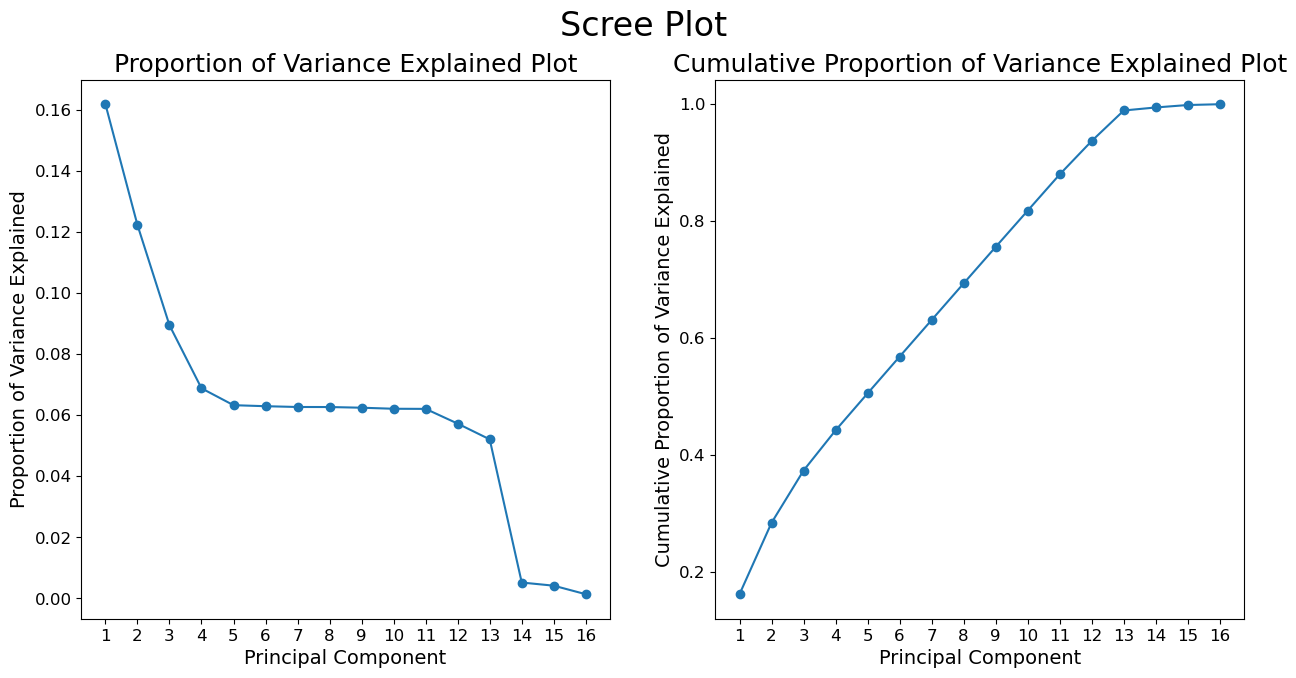

In [93]:
# Make a scree plot
indices = np.arange(1, 17) # indices for the components from 1 to n_components

fig, axs = plt.subplots(nrows=1, ncols=2)

# Set axis label font size to 12
axs[0].tick_params(axis="both", labelsize=12)
axs[1].tick_params(axis="both", labelsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

fig.set_size_inches(15, 7)
fig.suptitle("Scree Plot", fontsize=24)

# PVE plot
axs[0].plot(indices, pve, marker = 'o')
axs[0].set_ylabel("Proportion of Variance Explained", fontsize=14)
axs[0].set_xlabel("Principal Component", fontsize=14)
axs[0].set_title("Proportion of Variance Explained Plot", fontsize=18)
axs[0].set_xticks(indices)

# Cumulative PVE plot
axs[1].plot(indices, pve_cumulative, marker='o')
axs[1].set_ylabel("Cumulative Proportion of Variance Explained", fontsize=14)
axs[1].set_xlabel("Principal Component", fontsize=14)
axs[1].set_title("Cumulative Proportion of Variance Explained Plot", fontsize=18)
axs[1].set_xticks(indices)

plt.show()

**Specific Criteria Question 1:** 

**Plot: the scree plot/proportion of variance explained plot that results from your data. Discuss what the shape of it means about the decomposition.**

The `pve` array shows that the first principal component explains only 16.2% of the data. So, PCA is not a good approximation of this data. There is not one principal component that captures most of the variance in the data. Instead, the variance in the data is spread out among all the principal components. 

Looking at the cumulative PVE plot and the `pve_cumulative` variable, we believe it takes 10 principal components to approximate the data well, because that gives us a PVE of 81.8%.

Now we will plot the first two features of the transformed data, $Z$. $Z_{im}$ is the location of the i-th data point in the transformed space. Because there are 80,000 observations, we will do subsampling and randomly select 5,000 observations.

In [94]:
random_indices = np.random.choice(80000, size=5000, replace=False) # get indices of the rows to randomly select
Z_sample = pca_out[random_indices] # the selected rows of the Z matrix
X_sample = X_scaled.loc[random_indices, :] # the selected rows of the X matrix

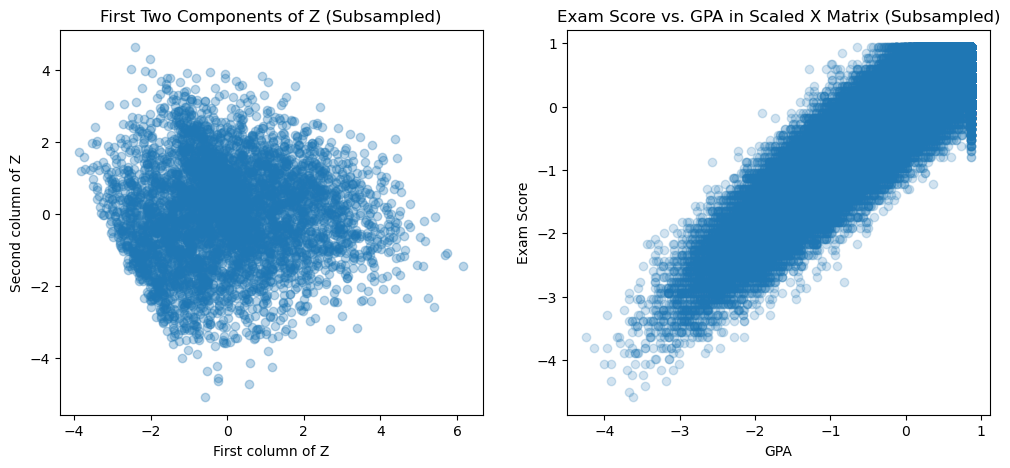

In [95]:
fig, axs = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((12, 5))

# Plot the data in the transformed space (Z)
axs[0].scatter(Z_sample[:, 0], Z_sample[:, 1], alpha = 0.3)

axs[0].set_xlabel("First column of Z")
axs[0].set_ylabel("Second column of Z")
axs[0].set_title("First Two Components of Z (Subsampled)")

# Plot two features of the original X matrix to compare
axs[1].scatter(X_scaled["previous_gpa"], X_scaled["exam_score"], alpha=0.2)
axs[1].set_xlabel("GPA")
axs[1].set_ylabel("Exam Score")
axs[1].set_title("Exam Score vs. GPA in Scaled X Matrix (Subsampled)")
plt.show()

The code below compares the correlation coefficient matrix between the first two columns of Z, and the corr. coef. matrix between `previous_gpa` and `exam_score` in X.

In [96]:
np.corrcoef(Z_sample[:, 0], Z_sample[:, 1])

array([[ 1.        , -0.00291346],
       [-0.00291346,  1.        ]])

In [97]:
np.corrcoef(X_sample.loc[:, "previous_gpa"], X_sample.loc[:, "exam_score"])

array([[1.        , 0.93656179],
       [0.93656179, 1.        ]])

**Discussion question: Plot the data in the first two principal components. What, if any, structure exists inherently within the data? How does this differ from plotting on two original features?**

Looking at just the plots, the plot of the original data ($X$) is much more linear than the plot of the transformed data ($Z$). We confirmed this using the correlation coefficient. The correlation coefficient between the first two columns of $Z$ is 0.0014, while the correlation coefficient for the original data is 0.93. That suggests a very strong positive correlation in the original data, and basically no correlation in the transformed data.

That means the first two principal components are not nearly as correlated with each other as those two features in $X$. There is a strong positive relationship between GPA and exam score in $X$. Furthermore, the loading vectors tell us that `exam_score` and `previous_gpa` are the two most important features in the data by far. However, doing PCA reduces the correlation between the two features plotted to basically zero. 

This makes sense when we look at the loading vectors. The loading vectors of PC1 and PC2 are shown again below, but this time sorted by the values of PC2. The loadings of `exam_score` and `previous_gpa` in the *second principal component* are about -0.03. That's low in magnitude compared to the highest-magnitude loadings for PC2. So, those features are not an important part of PC2. 

However, `screen_time`, `study_hours_per_day`, and `exam_anxiety_score` are the most important features of PC2, as indicated by the loadings below. And PC1 has `exam_score` and `previous_gpa` as important features. That means that, if the $Z$ plot shows little correlation, there's little correlation between the `exam_score` and `previous_gpa` features and the `screen_time`, `study_hours_per_day`, and `exam_anxiety_score` features, respectively. 

So, screen time, hours studied, and exam anxiety score do not have much of an effect on exam score and GPA.

In [98]:
principal_components.sort_values(by = "PC2", ascending=False)[["PC1", "PC2"]]

,PC1,PC2
screen_time,-0.290528,0.582071
study_hours_per_day,-0.291250,0.419916
exam_anxiety_score,0.379563,0.401580
social_media_hours,-0.088989,0.313666
netflix_hours,-0.070879,0.248817
stress_level,0.079583,0.006366
attendance_percentage,-0.004312,0.005182
time_management_score,-0.007481,0.003612
mental_health_rating,-0.012954,0.002225
parental_support_level,0.006836,0.000807


## Matrix Completion

First, we will introduce missing elements into the array in order to check the efficacy of the matrix completion later

In [99]:
np.random.seed(21)
X = X_scaled.to_numpy(copy=True)
missing_elements = int(X.shape[0] * 0.2)

row_index = np.random.choice(X.shape[0], size=missing_elements, replace=False)
column_index = np.random.choice(X.shape[1], size=missing_elements)

Xna = X.copy()
Xna[row_index, column_index] = np.nan

In [100]:
def fit_svd(X, M=1):
    U, s, V = np.linalg.svd(X,full_matrices=False)
    return U[:, :M] @ (np.diag(s[:M]) @ V[:M, :]) 

Then, we create a function that will return a completed matrix. In this function we initialize variables that will replace the missing values with column means and other variables that will be used to track the progress of the iterations that will be used to fit our data. A while loop is formed that will track and iterate fittings of matrix completions using SVD until the relative error becomes better then the threshold value we created earlier.

In [101]:
def matrix_completion(X_na, rank=5, max_iter=100, thresh=1e-7):
    import numpy as np

    # Initial mean imputation
    Xhat = X_na.copy()
    xbar = np.nanmean(Xhat, axis=0)
    ismiss = np.isnan(Xhat)

    for r, c in zip(*np.where(ismiss)):
        Xhat[r, c] = xbar[c]

    # Initial mean squared sum (error baseline)
    mss0 = np.mean((X_na[~ismiss] - Xhat[~ismiss])**2)
    mssold = mss0
    rel_err = 1
    iter_ = 0

    def fit_svd(X, M):
        U, s, Vt = np.linalg.svd(X, full_matrices=False)
        return (U[:, :M] @ np.diag(s[:M]) @ Vt[:M, :])

    while rel_err > thresh and iter_ < max_iter:
        iter_ += 1
        Xapp = fit_svd(Xhat, rank)
        Xhat[ismiss] = Xapp[ismiss]
        mss = np.mean((X_na[~ismiss] - Xapp[~ismiss])**2)
        rel_err = abs(mssold - mss) / mss0
        mssold = mss

    print(f"Iter: {iter_}, MSS: {mss:.6f}, Rel. Err: {rel_err:.6f}")
    return Xhat


/var/folders/26/10bvll0d0bbd32bg3wjhv0x00000gn/T/ipykernel_1141/3355276393.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  rel_err = abs(mssold - mss) / mss0


Iter: 100, MSS: 0.492593, Rel. Err: inf


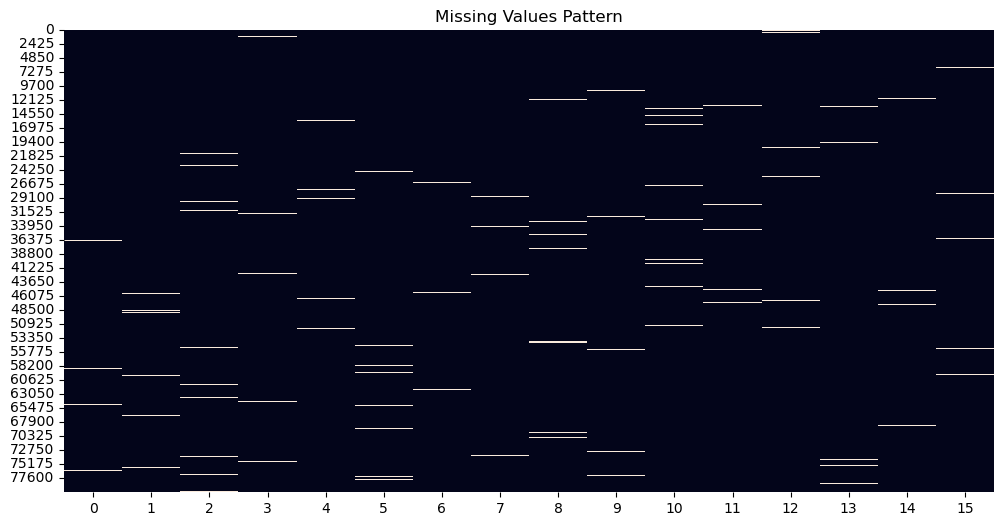

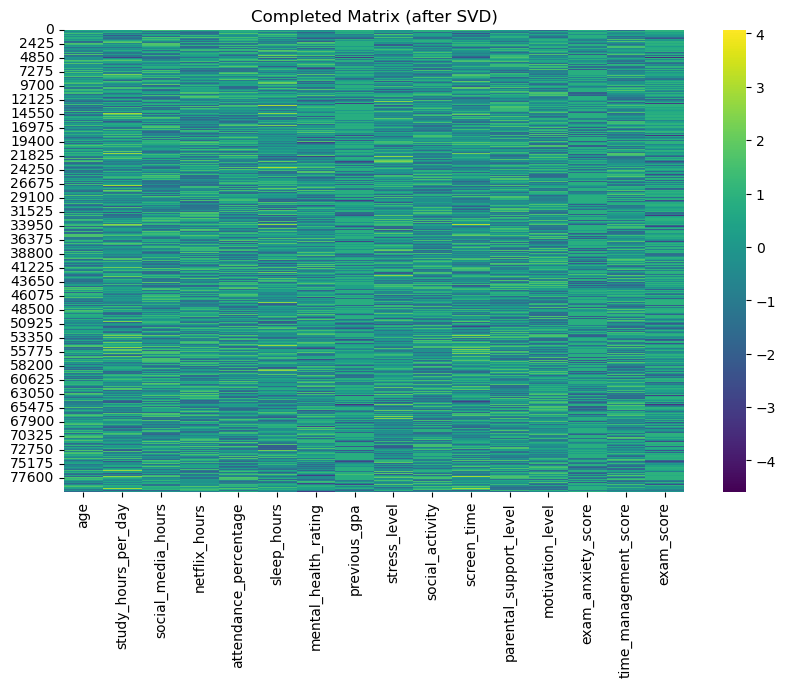

In [102]:
X_completed = matrix_completion(Xna, rank=5)

# Convert back to DataFrame for interpretation
X_completed_df = pd.DataFrame(X_completed, columns=X_scaled.columns)

# Compare histograms or heatmaps before and after
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(pd.DataFrame(Xna).isna(), cbar=False)
plt.title("Missing Values Pattern")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(X_completed_df, cmap="viridis")
plt.title("Completed Matrix (after SVD)")
plt.show()


In [103]:
has_nan = np.isnan(X_completed).any()

print("Matrix has NaN values:", has_nan)
has_nan = np.isnan(X_completed_df).any()

print("Matrix has NaN values:", has_nan)

Matrix has NaN values: False
Matrix has NaN values: age                       False
study_hours_per_day       False
social_media_hours        False
netflix_hours             False
attendance_percentage     False
sleep_hours               False
mental_health_rating      False
previous_gpa              False
stress_level              False
social_activity           False
screen_time               False
parental_support_level    False
motivation_level          False
exam_anxiety_score        False
time_management_score     False
exam_score                False
dtype: bool
